In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/data_stroke.csv')
data.head()

,Gender,Age,AF,Localisation,AMI_Unst.ang,GFR,Surv,Q_non_Q,DM
0,male,56,No_AF,Left_car,AMI,14,death,non_Q,Diabetes
1,male,59,No_AF,Left_car,Unst_ang,98,alive,NaN,No_Diabetes
2,female,86,AF,Left_car,AMI,57,death,non_Q,Diabetes
3,female,83,AF,Left_car,Unst_ang,69,alive,NaN,No_Diabetes
4,female,78,AF,Left_car,AMI,54,death,non_Q,No_Diabetes


In [5]:
data.describe(include='all')

,Gender,Age,AF,Localisation,AMI_Unst.ang,GFR,Surv,Q_non_Q,DM
count,113,113.000000,113,113,113,113.000000,113,54,113
unique,2,NaN,2,3,2,NaN,2,1,2
top,female,NaN,No_AF,Left_car,AMI,NaN,death,non_Q,No_Diabetes
freq,83,NaN,62,75,88,NaN,61,54,72
mean,NaN,77.017699,NaN,NaN,NaN,43.000000,NaN,NaN,NaN
std,NaN,8.869070,NaN,NaN,NaN,20.341285,NaN,NaN,NaN
min,NaN,56.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN
25%,NaN,71.000000,NaN,NaN,NaN,29.000000,NaN,NaN,NaN
50%,NaN,78.000000,NaN,NaN,NaN,40.000000,NaN,NaN,NaN
75%,NaN,83.000000,NaN,NaN,NaN,54.000000,NaN,NaN,NaN


In [13]:
import matplotlib
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
matplotlib.style.use('seaborn-whitegrid')

In [15]:
data['Surv'].value_counts()

death    61
alive    52
Name: Surv, dtype: int64

Text(0.5, 1.0, 'Outcome frequency')

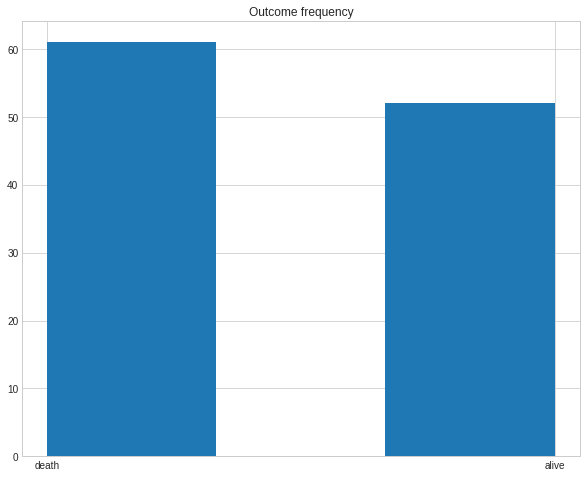

In [35]:
(data['Surv']).hist(bins=3)
plt.title('Outcome frequency')


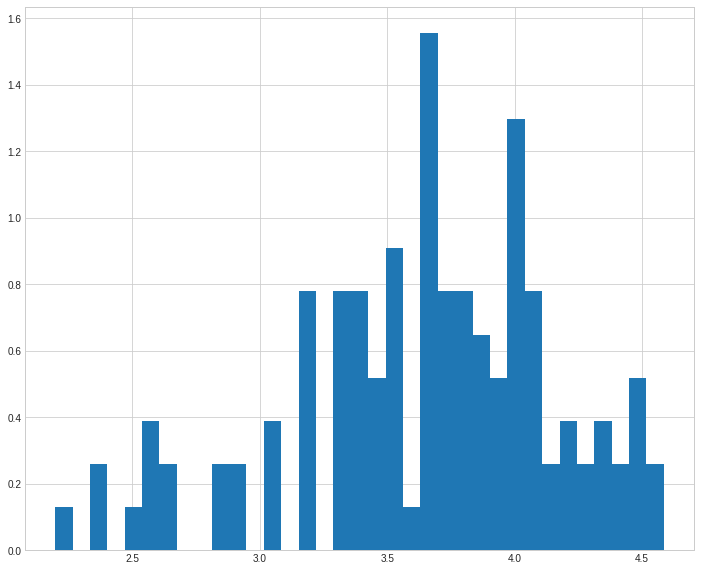

In [17]:
np.log(data['GFR']).hist(bins = 35, density=True)

In [18]:
from scipy.stats.kde import  gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist

Text(0.5, 1.0, 'Levels GFR')

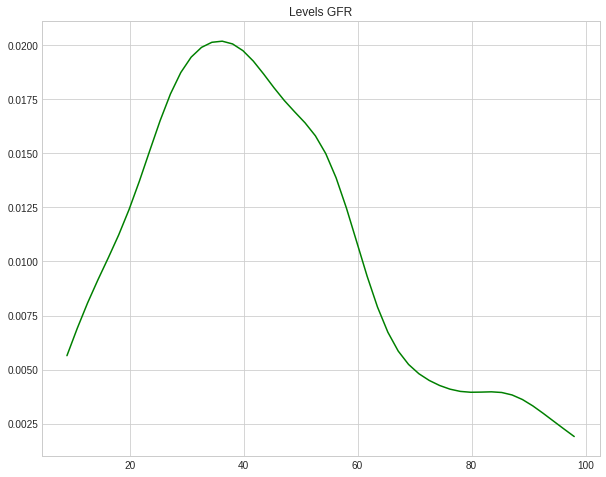

In [51]:
my_density= gaussian_kde(data['GFR'], bw_method=0.3)
x = linspace(min(data['GFR']), max(data['GFR']))
plot(x, my_density(x), 'green')
plt.title('Levels GFR')

Text(0.5, 1.0, 'Localization of cerebral infarction')

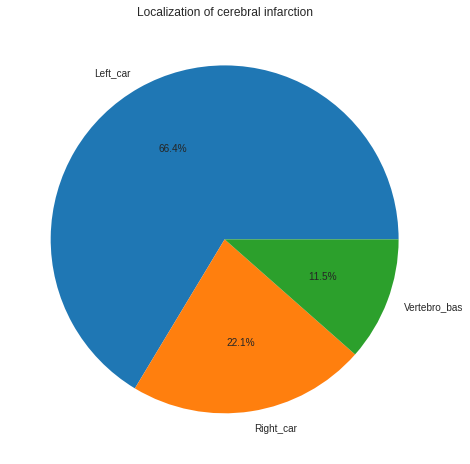

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 10, 8
matplotlib.style.use('seaborn-whitegrid')
labels=data['Localisation'].unique()
sizes=data['Localisation'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Localization of cerebral infarction')

Text(0.5, 1.0, 'GFR level in different groups  ')

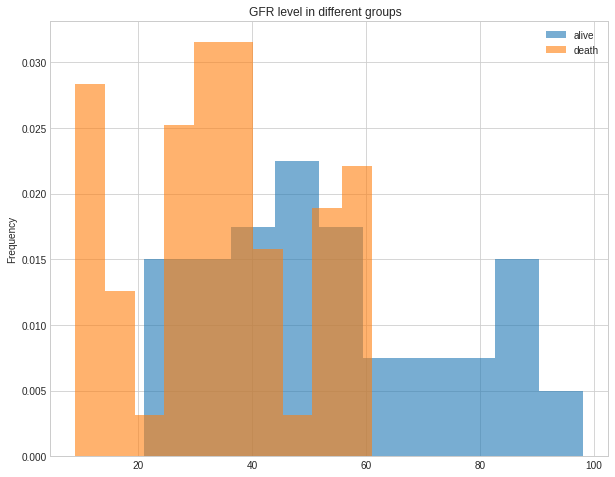

In [36]:
data.groupby('Surv')['GFR'].plot.hist(density=True, alpha = 0.6)
plt.legend()
plt.title('GFR level in different groups  ')


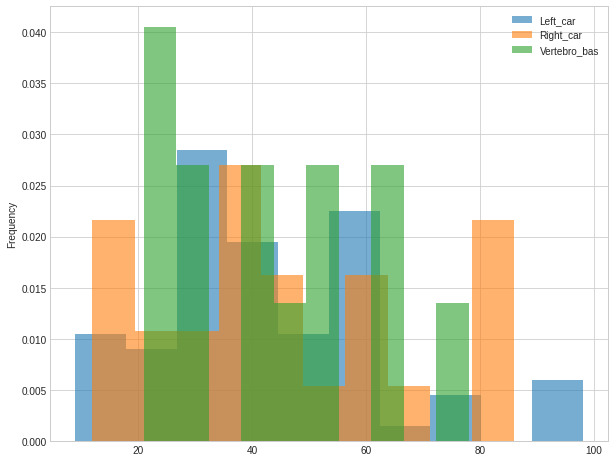

In [22]:
data.groupby('Localisation')['GFR'].plot.hist(density=True, alpha=0.6)
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

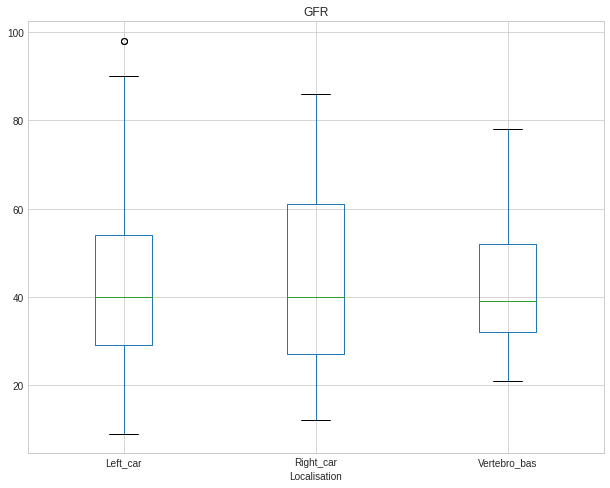

In [23]:
wisk = data.boxplot(column='GFR', by = 'Localisation')
wisk.get_figure().suptitle('')

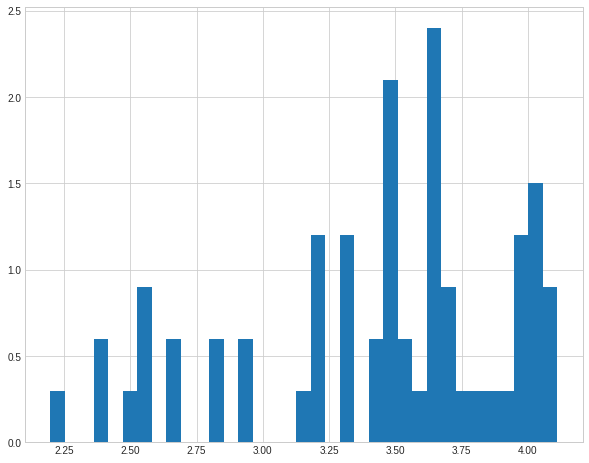

In [24]:
only_death = data[data['Surv'] == 'death']
np.log(only_death['GFR']).hist(bins=35, density=True)

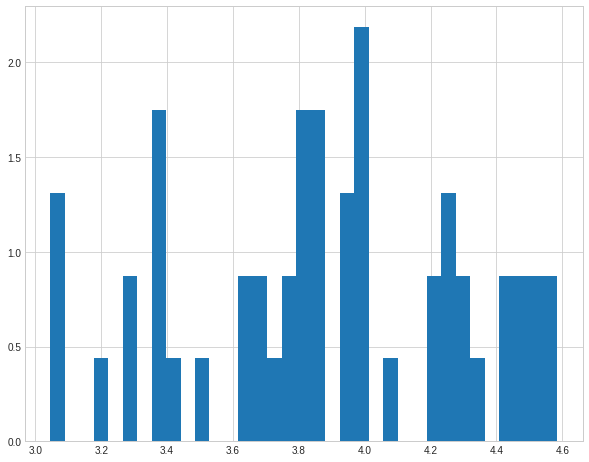

In [25]:
only_alive = data[data['Surv'] == 'alive']
np.log(only_alive['GFR']).hist(bins=35, density=True)

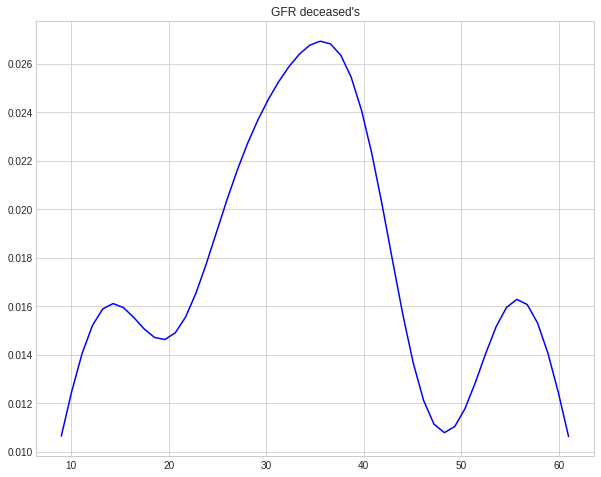

In [48]:
def gfr_only_death(data):
  my_density= gaussian_kde(only_death['GFR'], bw_method=0.3)
  x = linspace(min(only_death['GFR']), max(only_death['GFR']))
  plot(x, my_density(x), 'blue')
  plt.title("GFR deceased's")
gfr_only_death(data)


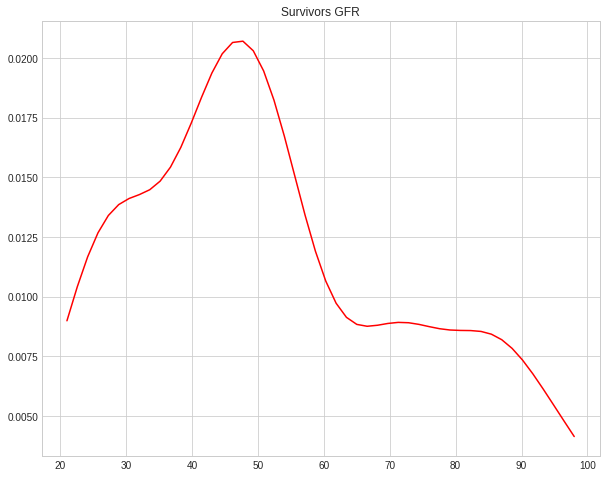

In [47]:
def gfr_only_alive(data):
  my_density = gaussian_kde(only_alive['GFR'], bw_method=0.3)
  x = linspace(min(only_alive['GFR']), max(only_alive['GFR']))
  plot(x, my_density(x), 'red')
  plt.title('Survivors GFR')
gfr_only_alive(data)


In [28]:
!pip install joypy
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

Text(0.5, 1.0, 'Age and levels GFR in different groups')

<Figure size 1280x800 with 0 Axes>

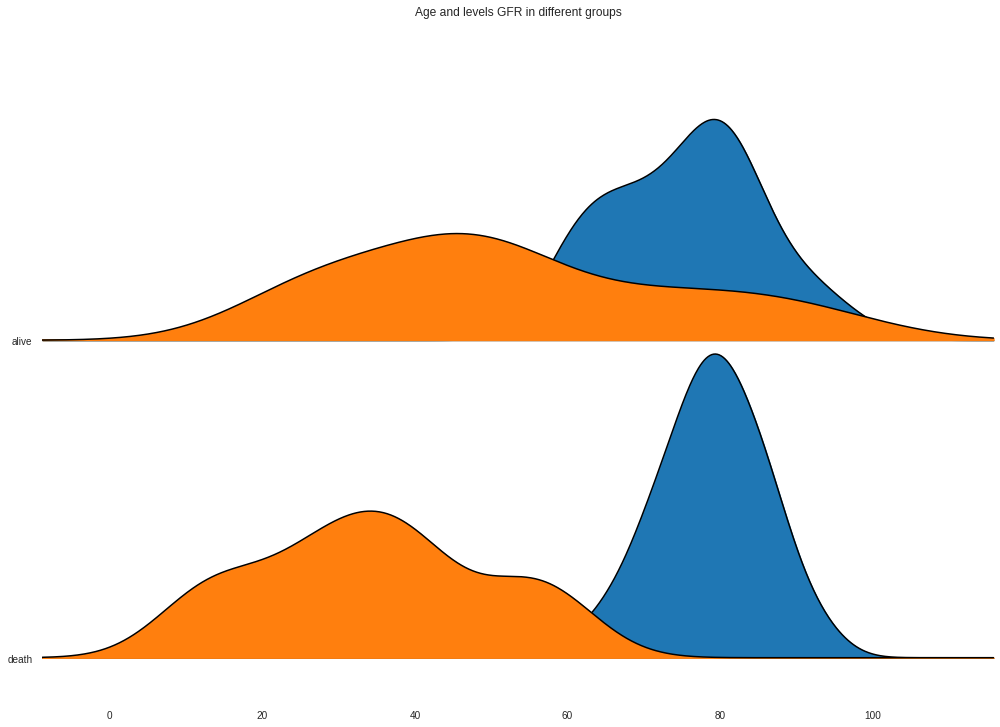

In [46]:
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(data, column=['Age', 'GFR'], by = 'Surv', figsize=(14,10))
plt.title('Age and levels GFR in different groups')